<a href="https://colab.research.google.com/github/utkarsh1508-p/Convolutional-Neural-Networks-in-TensorFlow/blob/main/C2/W4/assignment/C2_W4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [3]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      ### START CODE HERE
      rows = csv.reader(training_file, delimiter=',')
      labels = []
      images = []
      
      for i in rows:
          labels.append(i[0])
          images.append(np.array(i[1:]).reshape((28, 28)))
          
      #print(images[0])
      images = images[1:]
      labels = labels[1:]
      labels = np.array(labels).astype(float)
      images = np.array(images).astype(float)

      ### END CODE HERE
    return images, labels


training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 133MB/s]
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)

training_images = training_images.reshape(27455, 28, 28, 1)
testing_images = testing_images.reshape(7172, 28, 28, 1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40, height_shift_range=0.2, width_shift_range=0.2,
                                  shear_range=0.2, zoom_range=0.2, fill_mode='nearest', horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(26, activation='softmax')
                                    ])

# Compile Model. 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

train_gen = train_datagen.flow(training_images, training_labels, batch_size=50)

val_gen = validation_datagen.flow(testing_images, testing_labels, batch_size=50)

# Train the Model
history = model.fit_generator(train_gen, validation_data=val_gen, epochs=20)

# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
550/550 [==============================] - 44s 26ms/step - loss: 2.6873 - acc: 0.1823 - val_loss: 1.9328 - val_acc: 0.3489
Epoch 2/20
550/550 [==============================] - 14s 26ms/step - loss: 1.9832 - acc: 0.3718 - val_loss: 1.2839 - val_acc: 0.5616
Epoch 3/20
550/550 [==============================] - 14s 26ms/step - loss: 1.5873 - acc: 0.4897 - val_loss: 0.8792 - val_acc: 0.6781
Epoch 4/20
550/550 [==============================] - 14s 26ms/step - loss: 1.3431 - acc: 0.5639 - val_loss: 0.9342 - val_acc: 0.6527
Epoch 5/20
550/550 [==============================] - 14s 26ms/step - loss: 1.1502 - acc: 0.6201 - val_loss: 0.6625 - val_acc: 0.7592
Epoch 6/20
550/550 [==============================] - 14s 26ms/step - loss: 1.0085 - acc: 0.6684 - val_loss: 0.5158 - val_acc: 0.8263
Epoch 7/20
550/550 [==============================] - 14s 26ms/step - loss: 0.9044 - acc: 0.7024 - val_loss: 0.4747 - val_acc: 0.8292
Epoch 8/20
550/550 [==============================] - 14s 26ms

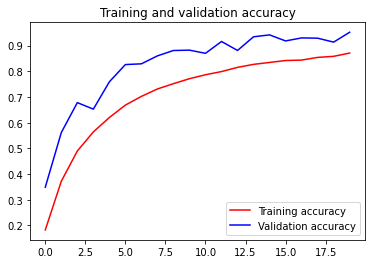

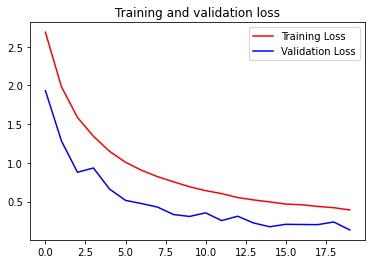

In [7]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()